In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
suppressPackageStartupMessages(suppressWarnings(library(shiny)))

In [2]:
# set UMAP df path
umap_df_path <- file.path("..","..","1.scDINO_run/outputdir/apoptosis_timelapse/CLS_features/CLS_features_annotated_umap.csv")
# load UMAP df
umap_df <- read.csv(umap_df_path)
options(repr.matrix.max.rows = 10, repr.matrix.max.cols = 5)

head(umap_df)

,X,Metadata_image_path,Metadata_Well,⋯,UMAP1,UMAP2
,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>
1,0,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_102.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_102.0_index_145086_crop.tiff,C-02,⋯,0.7985411,2.4738266
2,1,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_106.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_106.0_index_145087_crop.tiff,C-02,⋯,0.8914294,1.4860868
3,2,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_122.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_122.0_index_145088_crop.tiff,C-02,⋯,0.9050200,2.4801580
4,3,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_128.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_128.0_index_145090_crop.tiff,C-02,⋯,-3.3078710,-0.3118700
5,4,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_13.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_13.0_index_145073_crop.tiff,C-02,⋯,1.6292739,1.2213604
6,5,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_137.0/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_137.0_index_145091_crop.tiff,C-02,⋯,-3.6328542,0.3817371


In [3]:
unique(umap_df$Metadata_Time)
umap_df$Metadata_Time <- factor(
    umap_df$Metadata_Time,
    levels=c(
        0,1,2,3,4,5,6,7,8,9,10,11,12,13
)
)
unique(umap_df$Metadata_Time)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

[1] 1  2  3  4  5  6  7  8  9  10 11 12 13
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13

In [4]:
# get all wells
unique(umap_df$Metadata_Well)

[1] "C-02" "C-03" "C-04" "C-05" "C-06" "C-07" "C-08" "C-09" "C-10" "C-11"
[11] "D-02" "D-03" "D-04" "D-05" "D-06" "D-07" "D-08" "D-09" "D-10" "D-11"
[21] "E-02" "E-03" "E-04" "E-05" "E-06" "E-07" "E-08" "E-09" "E-10" "E-11"

In [5]:
# remove the T from the time column
umap_df$Metadata_Time <- gsub("T","",umap_df$Metadata_Time)
# convert to numeric
umap_df$Metadata_Time <- as.numeric(umap_df$Metadata_Time)


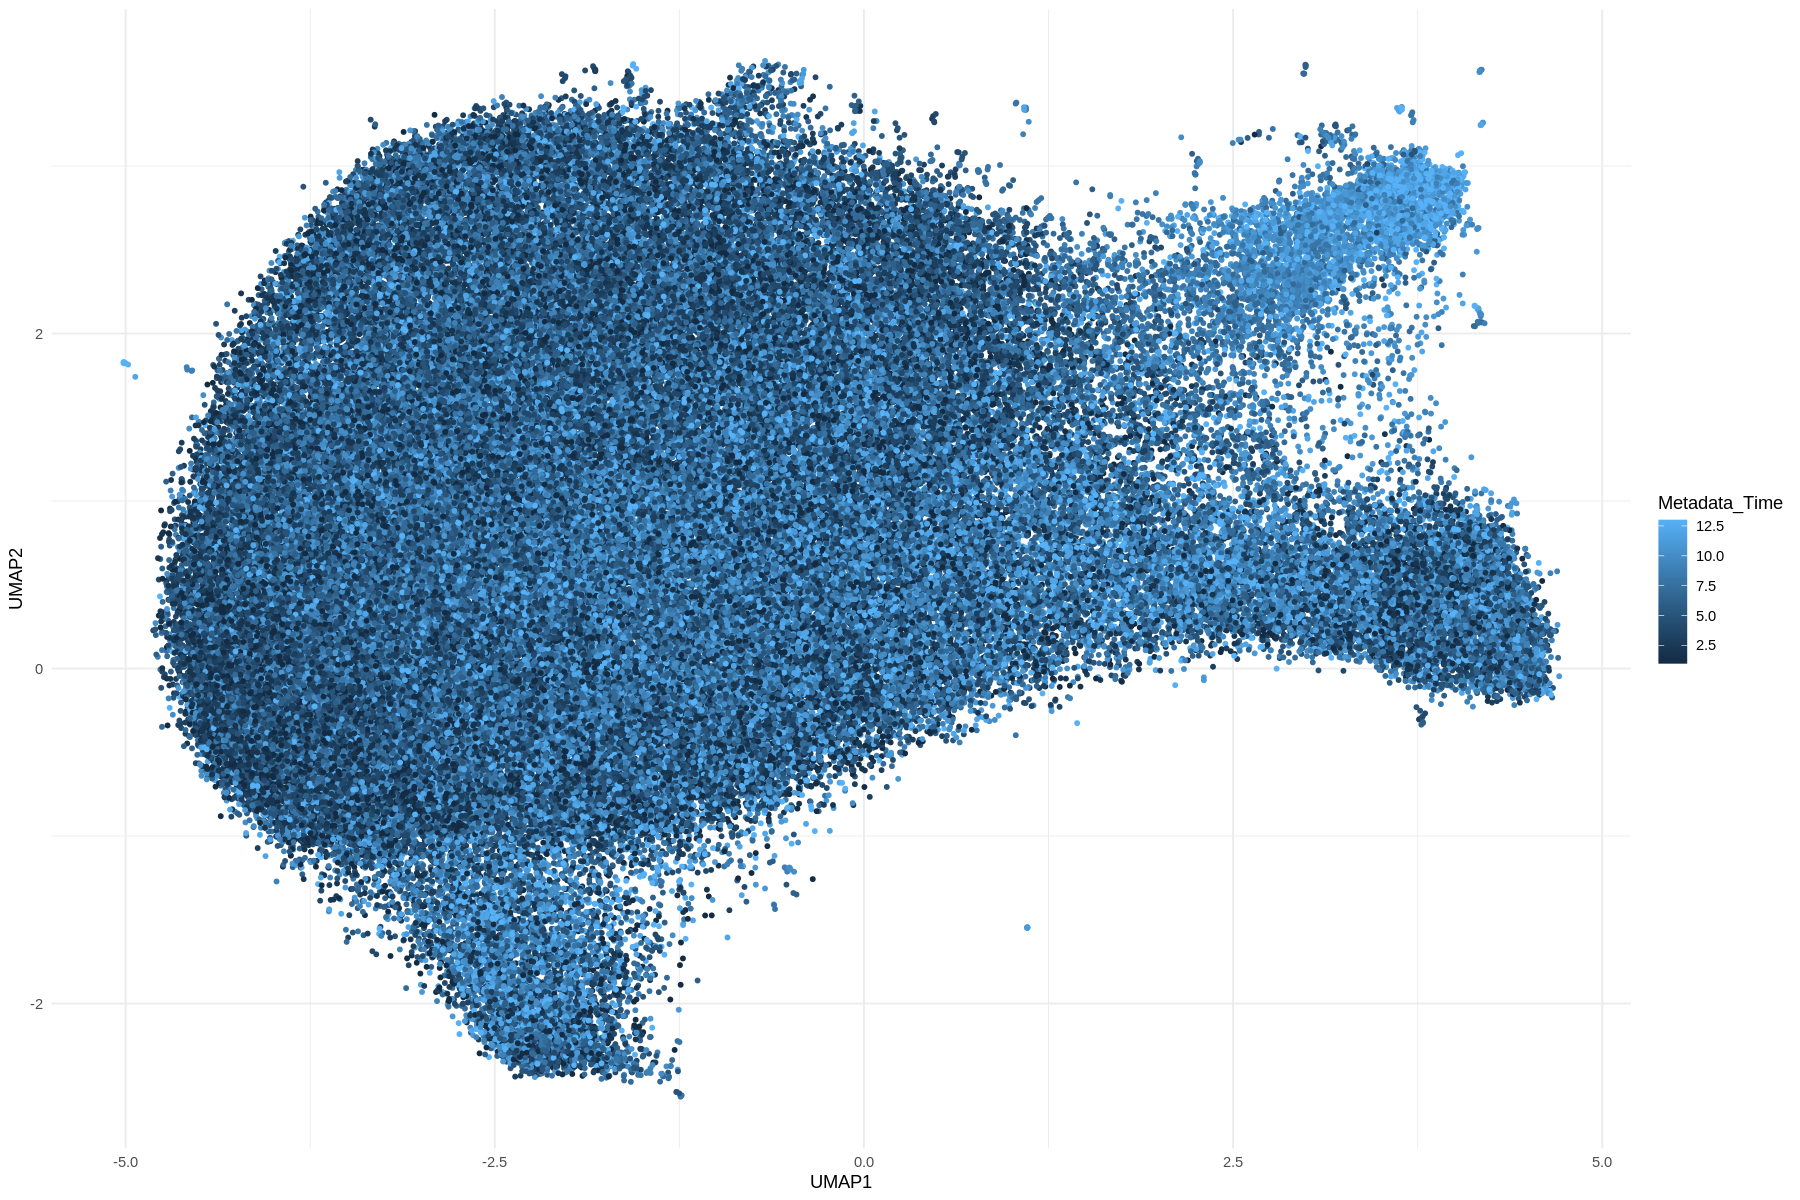

In [6]:
# plot UMAP
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP1, y = UMAP2, color = Metadata_Time))
    + geom_point(size = 1)
    + theme_minimal()
    + theme(legend.position = "right")
)
umap_plot